<a href="https://colab.research.google.com/github/CoderBabu143/CoderBabu143/blob/main/CUSTOMER_SPENT_ANALYSIS_USING_K_MEANS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



**LOAD DATASET FROM LOCAL DIRECTORY**


In [8]:
from google.colab import files
uploaded=files.upload()

Saving CUSTOMER SPENT ANALYSIS  DATA.csv to CUSTOMER SPENT ANALYSIS  DATA (3).csv


**IMPORTING THE DATASET**

In [12]:

dataset=pd.read_csv('CUSTOMER SPENT ANALYSIS  DATA (3).csv')

SUMMARIZE DATASET

In [13]:
#SUMMARIZE DATASET
print(dataset.shape)
print(dataset.describe())
print(dataset.head(5))

(99, 2)
            INCOME        SPEND
count    99.000000    99.000000
mean    323.484848   208.080808
std     244.576534   168.106786
min     240.000000   150.000000
25%     250.000000   170.000000
50%     280.000000   173.000000
75%     300.000000   179.000000
max    2243.000000  1178.000000
   INCOME  SPEND
0     240    172
1     250    173
2     270    170
3     280    150
4     290    168


**SEGREGATE AND ZIPPING DATASET**

In [14]:
Income=dataset['INCOME'].values
Spend=dataset['SPEND'].values
X=np.array(list(zip(Income,Spend)))
X

array([[ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,  200],
       [ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,  200],
       [ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,  200],
       [ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,  200],
       [ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,  200],
       [ 240,  172],
       [ 250,  173],
       [ 270,  170],
       [ 280,  150],
       [ 290,  168],
       [ 300,  179],
       [ 243,  178],
       [ 330,

**FINDING THE OPTIMIZED K VALUE**  

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

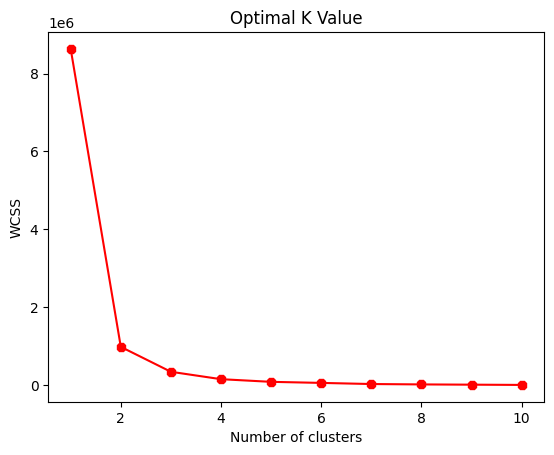

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,random_state=0)
  km.fit(X)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss,color="red",marker="8")
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**FINDING THE K-MEANS TO THE DATASET WITH K=4**

In [18]:
model=KMeans(n_clusters=4,random_state=0)
y_means=model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**VISUALISING THE CLUSTERS FOR K=4**

*cluster1:Customers with medium income and low spend*

*cluster2:Customers with high income and medium to high spend*

*cluster3:customers with low income*

*cluster4:Customers with medium income but high spend*

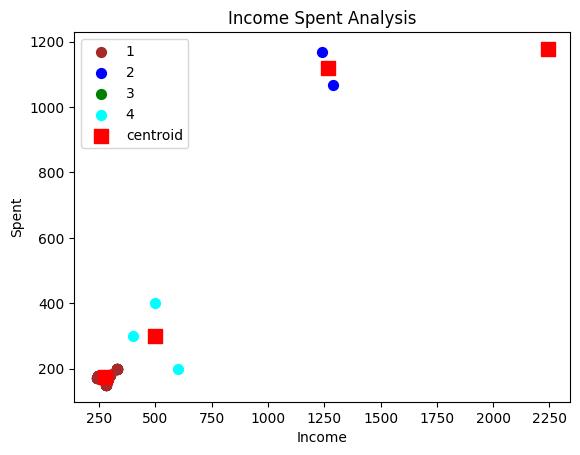

In [21]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='brown',label='1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='cyan',label='4')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=100,marker='s',c='red',label='centroid')
plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()